<a href="https://colab.research.google.com/github/ranimbouraoui3/Beware_of_poisonous_mushrooms_ML/blob/main/Beware_of_poisonous_mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('mushrooms.csv', header=0)

columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

data.head()
columns == data.columns.to_list()



True

# Data Exploration


In [ ]:

count = data.isin(['?']).sum()
percent = (count / data.shape[0]) * 100

missing_summary = pd.DataFrame({
    'Missing Count': count,
    'Missing %': percent.round(2)
})

print(missing_summary)



                          Missing Count  Missing %
class                                 0       0.00
cap-shape                             0       0.00
cap-surface                           0       0.00
cap-color                             0       0.00
bruises                               0       0.00
odor                                  0       0.00
gill-attachment                       0       0.00
gill-spacing                          0       0.00
gill-size                             0       0.00
gill-color                            0       0.00
stalk-shape                           0       0.00
stalk-root                         2480      30.53
stalk-surface-above-ring              0       0.00
stalk-surface-below-ring              0       0.00
stalk-color-above-ring                0       0.00
stalk-color-below-ring                0       0.00
veil-type                             0       0.00
veil-color                            0       0.00
ring-number                    

> the `stalk-root` feature will cause us problems further down the line. the missing values are 30% of the overall data size

#### We propose 3 approaches:
- Remove the rows with a missing value in stalk-root *( bad idea because we will be deleting 30% of the dataset)*

- Remove the ``stalk-root column` *( to further study)*

- Replace the missing values with the mode *(to further study )*

```
```



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


 > -> all features are categorical

#####  understading the `stalk-oder` feature

## 🧪 Chi-squared Test and p-value Explained

### 📊 What is the **Chi-squared (χ²) test**?

The **Chi-squared test** is a statistical method used to determine whether there is a **significant association between two categorical variables**.

👉 In our case:
- Is `stalk-root` associated with the target variable `class` (edible or poisonous)?

#### ✅ How it works:
- It compares the **observed frequencies** in your data to the **expected frequencies** assuming no association.
- If the observed distribution differs significantly from the expected one, the test returns a **high chi-squared value**.

---

### 📉 What is the **p-value**?

The **p-value** represents the **probability** that the observed association is due to **random chance**.

#### ✅ Interpretation:

| p-value        | Meaning                                           |
|----------------|---------------------------------------------------|
| **< 0.05**     | 🟢 Statistically **significant** → strong evidence of association |
| ≥ 0.05         | 🔴 **Not significant** → weak or no evidence of association |

---


### ⚠️ Notes:
- Works only with **categorical variables**.
- Tells you if an association exists, **not how strong** it is.


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Encode categorical features numerically
X = data[['stalk-root']].copy()
y = data['class'].copy()

X = X[X['stalk-root'] != '?']  # Remove missing
y = y[X.index]

X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Perform chi-squared test
chi_vals, p_vals = chi2(X_encoded, y_encoded)
print(f"Chi2: {chi_vals[0]:.6f}, p-value: {p_vals[0]:.12f}")


Chi2: 673.288351, p-value: 0.000000000000


In [ ]:
pd.crosstab(data['stalk-root'], data['class'], margins=True)


class,e,p,All
stalk-root,,,
?,720,1760,2480
b,1920,1856,3776
c,512,44,556
e,864,256,1120
r,192,0,192
All,4208,3916,8124


## 🔍 Interpretation of `stalk-root` Crosstab with `class`

### ✅ Key Observations:

1. **Missing Values (`?`) Are Substantial**
   - 2480 rows (≈30%) have missing `stalk-root`.
   - Among these, **1760 are poisonous** → **71% of missing values are poisonous**.
   - This is higher than the global poison rate (≈48%), meaning the missing values may carry predictive information.

2. **Certain `stalk-root` Values Strongly Associate with `class`**

| `stalk-root` | Most Associated Class | Confidence |
|--------------|-----------------------|------------|
| `c`          | Edible (`e`)          | 92%        |
| `e`          | Edible (`e`)          | 77%        |
| `r`          | Edible (`e`)          | 100%       |
| `b`          | Mixed                 | 50.9% edible, not clearly predictive |

3. **High Predictive Potential**
   - Values like `c`, `e`, and `r` are skewed toward **edible** mushrooms.
   - The `?` category is skewed toward **poisonous**, so it’s informative.

---


## 🧠 Conclusion:
> ✅ There is a very strong, statistically significant association between `stalk-root` and `class`.

**This means:**

The distribution of `stalk-root` values depends on whether the mushroom is **edible** or **poisonous**.

>  `stalk-root` is a highly predictive feature and **should not be dropped**.  
>  As a fix, Treat `'?'` as its own **valid category** by replacing it with `'ambiguous'`:


# Data cleaning
> replacing the missing values with the most frequent value.

In [ ]:
data_fill_mode = data.copy()
data_fill_mode ['stalk-root']= data_fill_mode['stalk-root'].replace('?', np.nan)
data_fill_mode['stalk-root' ]= data_fill_mode['stalk-root'].fillna('ambiguous')
print ("after treatment")

print (data_fill_mode.isin( ['?']).sum() )

after treatment
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


# data visualization


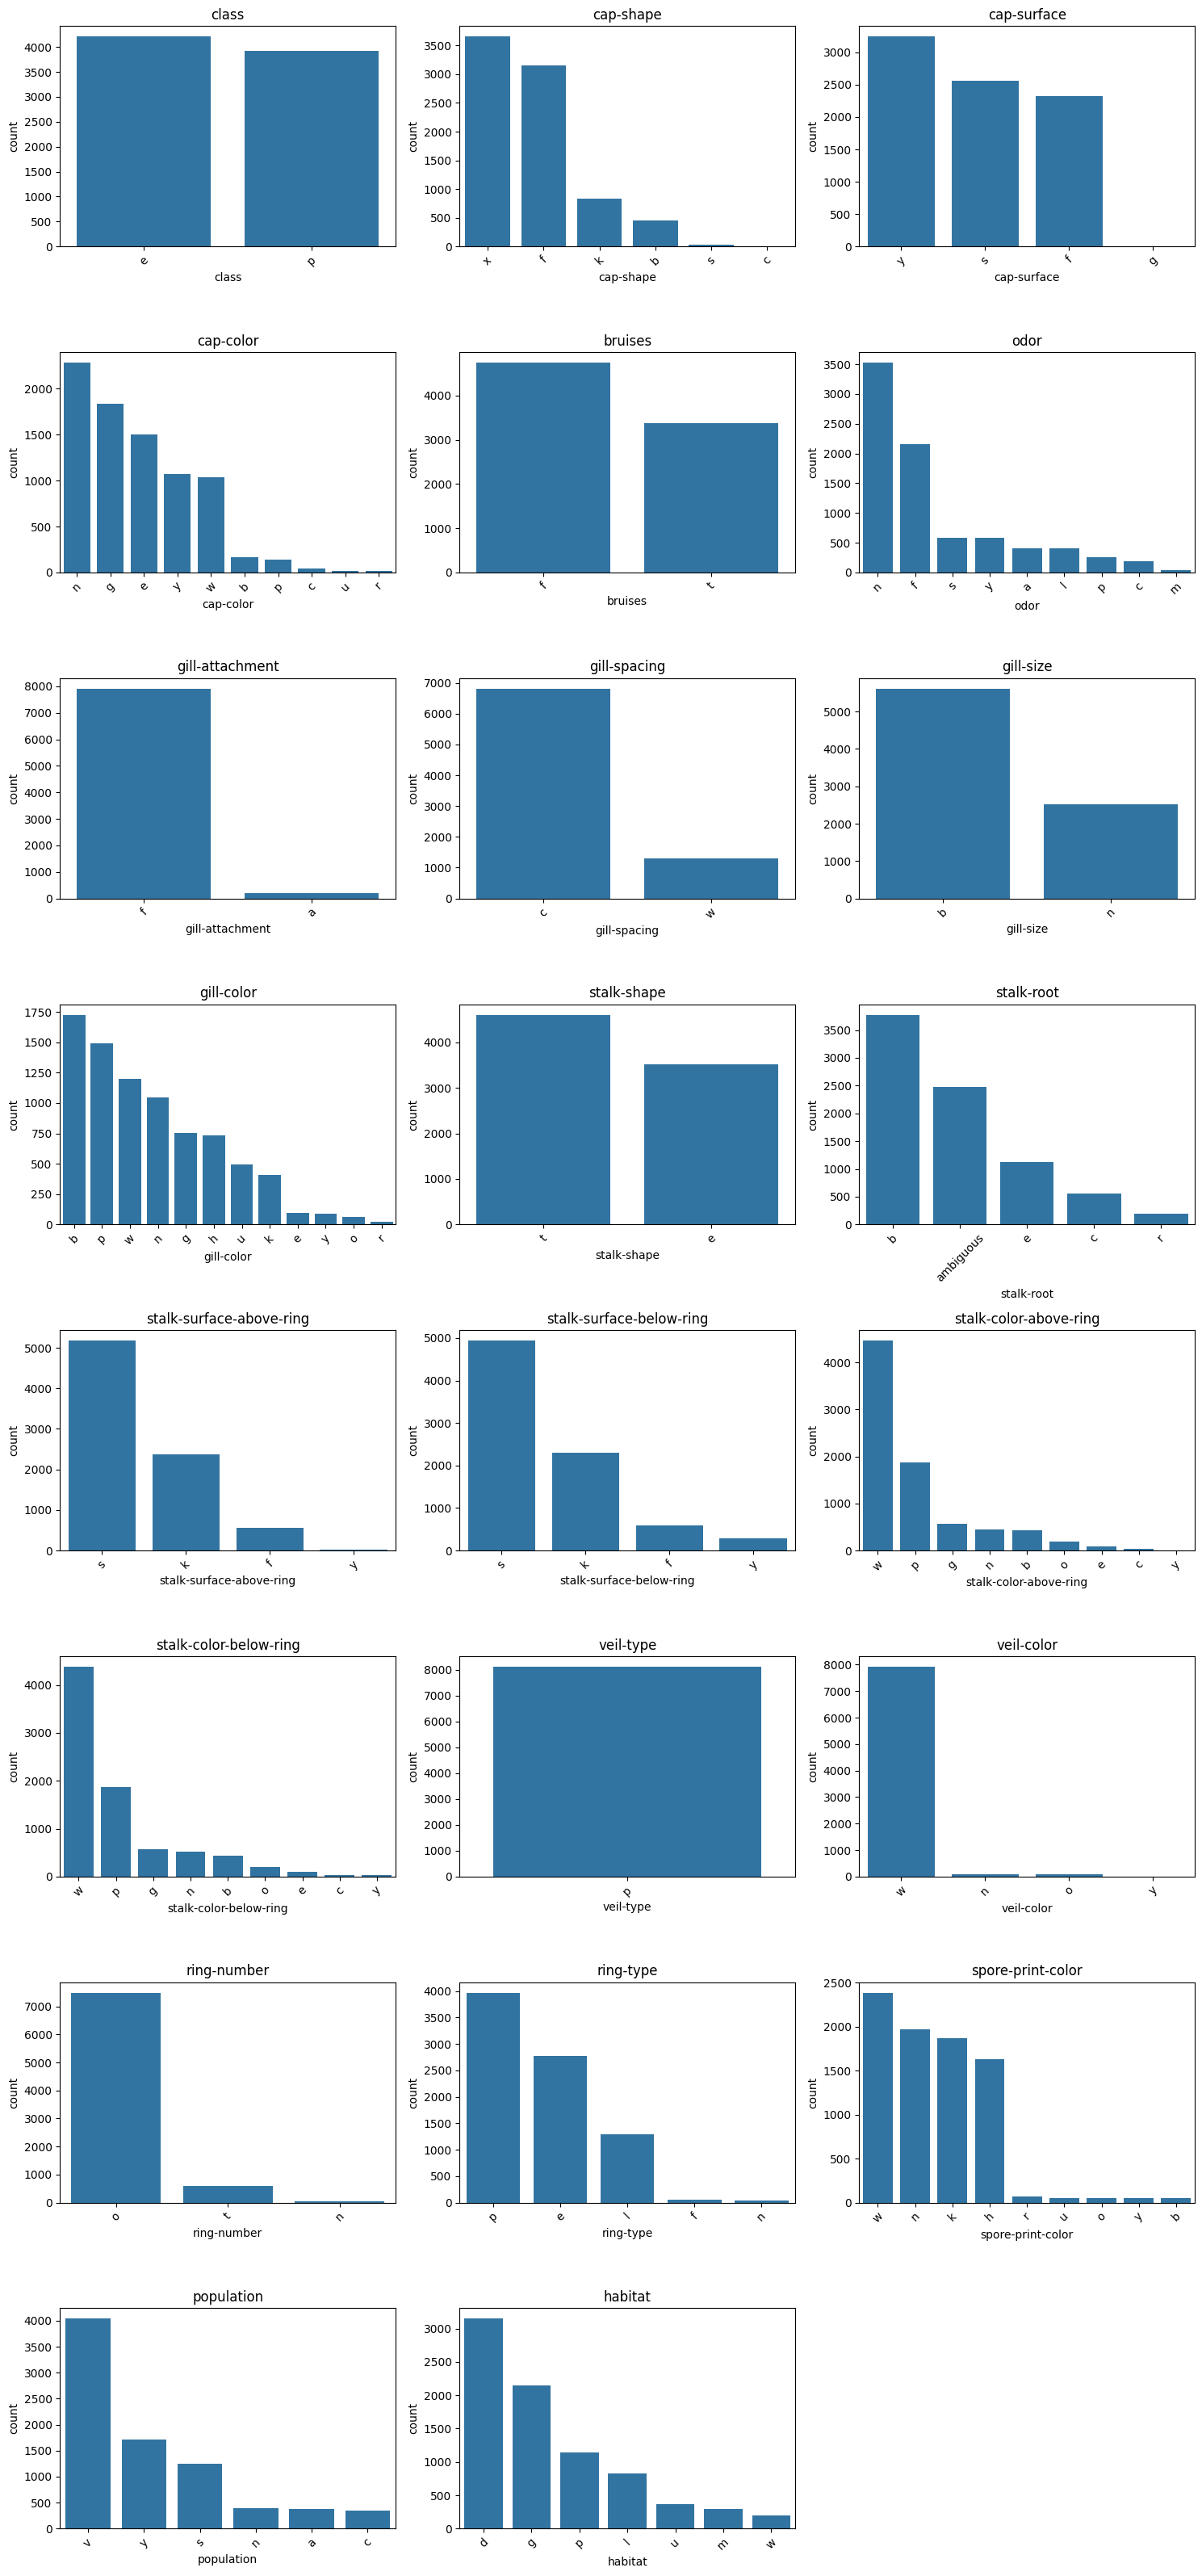

In [ ]:

# Get all categorical columns
cat_cols = data_fill_mode.select_dtypes(include='object').columns
n = len(cat_cols)

# Set up the subplot grid
cols = 3  # Number of plots per row
rows = (n + cols - 1) // cols  # Calculate rows needed

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=data_fill_mode, x=col, order=data_fill_mode[col].value_counts().index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

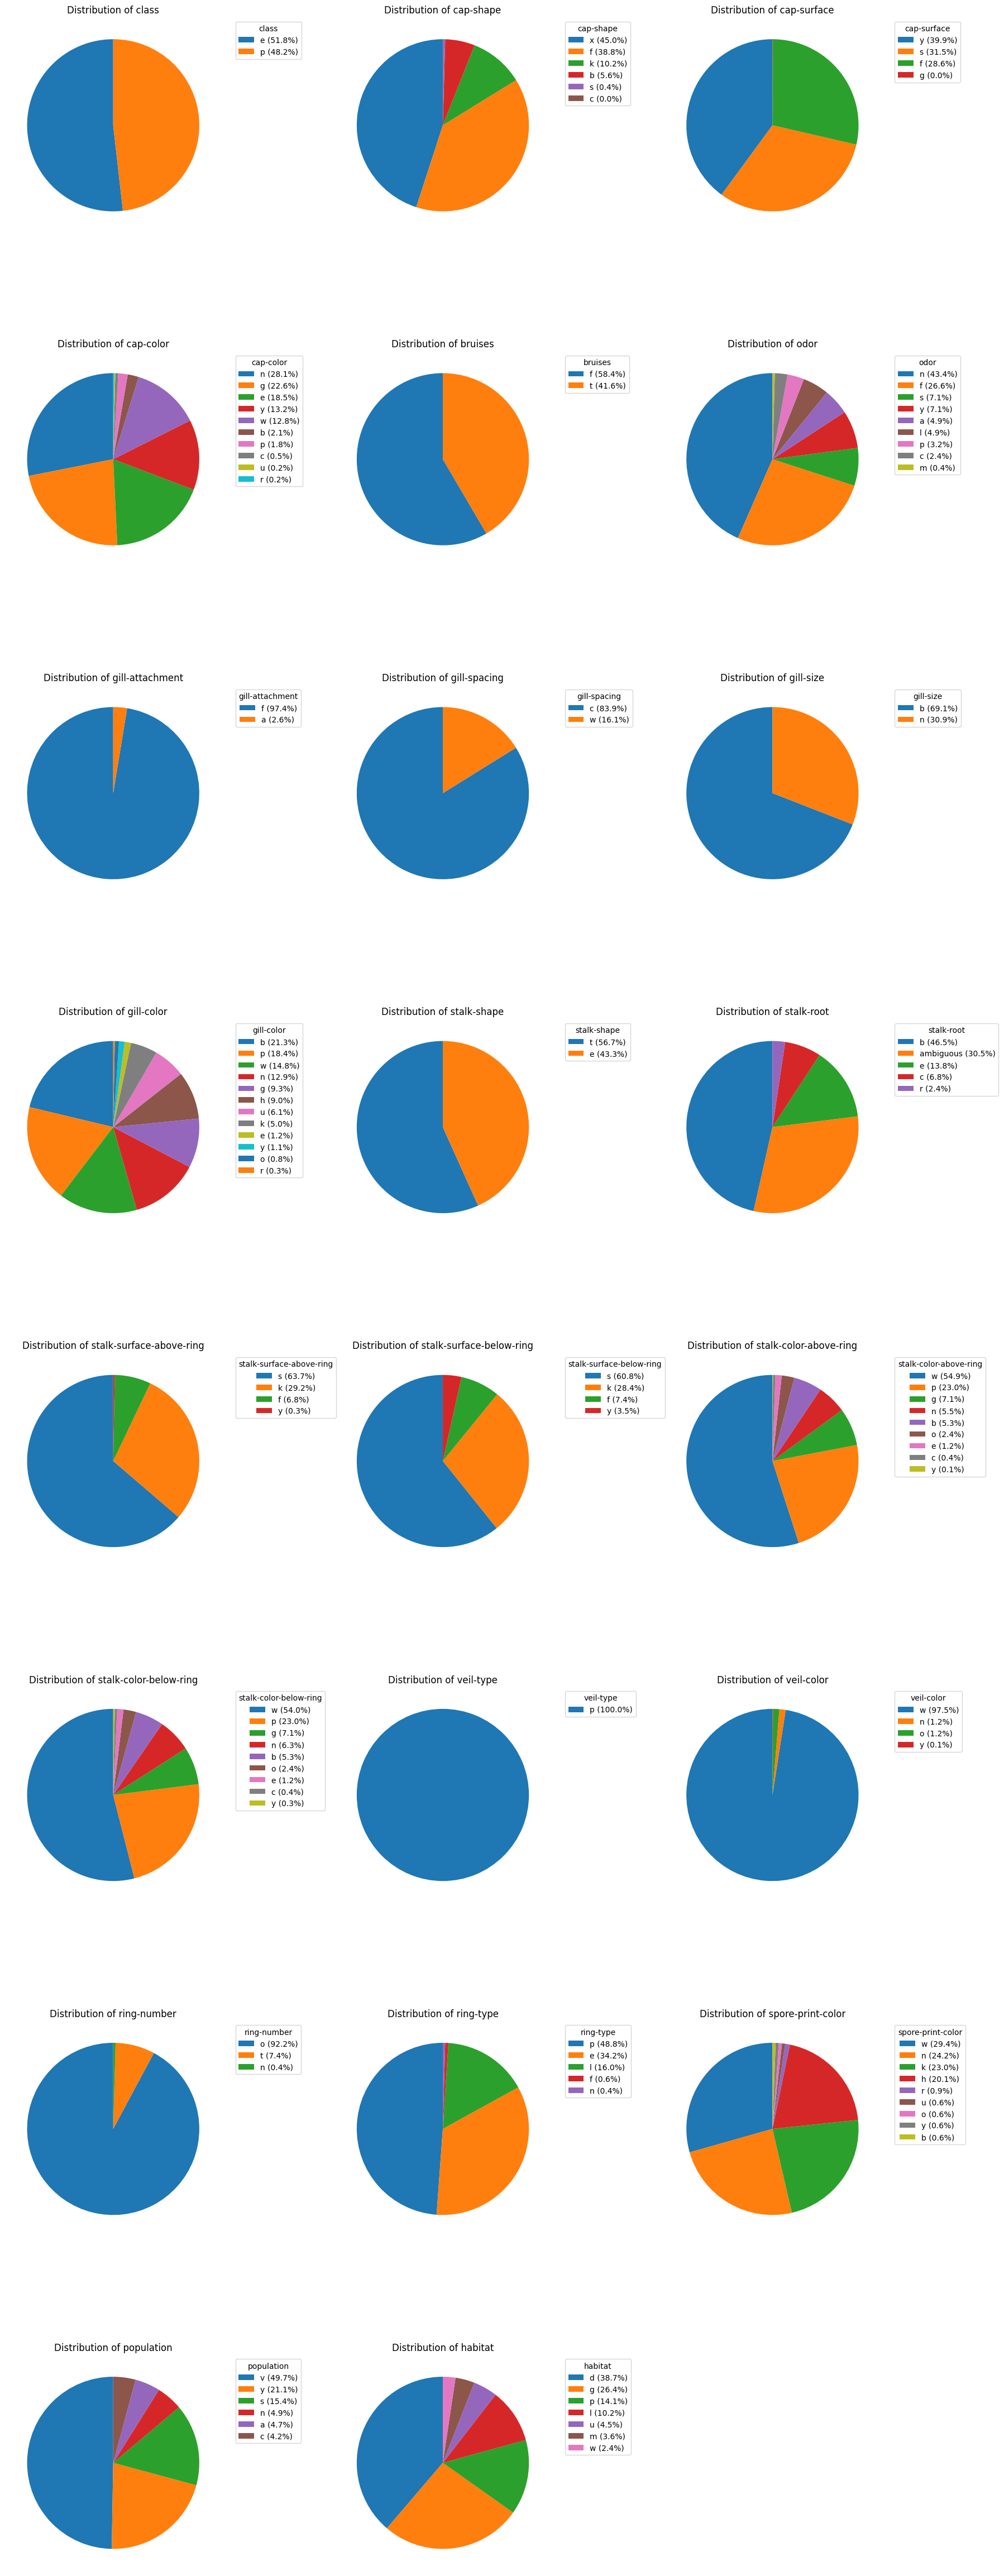

In [ ]:

# Get all categorical columns
cat_cols = data_fill_mode.select_dtypes(include='object').columns
n = len(cat_cols)

# Subplot grid setup
cols = 3  # Number of pie charts per row
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 6))

for i, col in enumerate(cat_cols, 1):
    counts = data_fill_mode[col].value_counts()
    labels = [f'{cat} ({pct:.1f}%)' for cat, pct in zip(counts.index, counts / counts.sum() * 100)]

    plt.subplot(rows, cols, i)
    plt.pie(counts, labels=None, startangle=90)
    plt.legend(labels, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



> Distribution of the classes `e` (edible) and `p` (posinious)



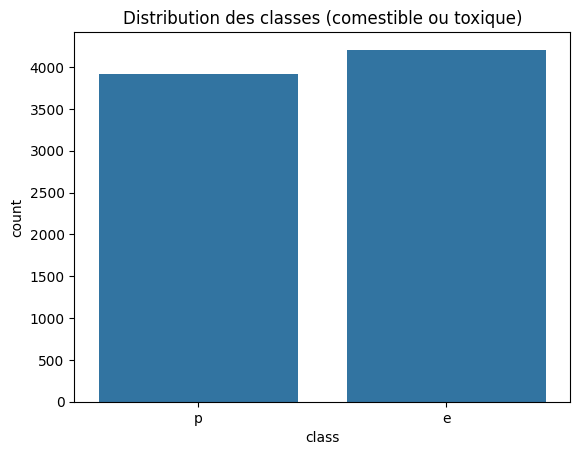

In [ ]:
sns.countplot(x='class', data=data)
plt.title("Distribution des classes (comestible ou toxique)")
plt.show()

the classes are ` **well balanced** `


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = data_fill_mode.drop('class', axis=1)
y = data_fill_mode['class']

# Encoder chaque colonne
X_encoded = X.apply(le.fit_transform)
y_encoded = le.fit_transform(y)

In [ ]:

# Show the mapping
print("Mapping of encoded classes:")
for i, cls in enumerate(le.classes_):
    print(f"{cls} → {i}")


Mapping of encoded classes:
e → 0
p → 1


In [ ]:
from sklearn.feature_selection import chi2
chi_scores, p_values = chi2(X_encoded, y_encoded)

In [ ]:
# Check for missing values
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                     Feature   Chi2 Score        p-value
8                 gill-color  5957.764469   0.000000e+00
18                 ring-type  1950.610146   0.000000e+00
7                  gill-size  1636.606833   0.000000e+00
3                    bruises  1194.277352  1.069037e-261
10                stalk-root  1186.029221  6.630617e-260
6               gill-spacing   826.795274  8.061293e-182
21                   habitat   751.309489  2.082916e-165
19         spore-print-color   379.132729   1.922119e-84
20                population   311.766736   9.002366e-70
11  stalk-surface-above-ring   222.982400   2.022392e-50
1                cap-surface   214.068544   1.779362e-48
12  stalk-surface-below-ring   206.648180   7.398869e-47
13    stalk-color-above-ring   119.792216   7.024638e-28
14    stalk-color-below-ring   109.789410   1.089740e-25
4                       odor    75.910163   2.968682e-18
9                stalk-shape    36.594105   1.454709e-09
17               ring-number   

High Chi² Score = strong dependency with `class` = useful for the model



Low p-value (e.g., < 0.05) = statistically significant result


In [ ]:
colonnes_a_supprimer = ['cap-color', 'veil-color', 'gill-attachment', 'veil-type']
X_encoded = X_encoded.drop(columns=colonnes_a_supprimer)



# KNN
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold, ParameterGrid, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

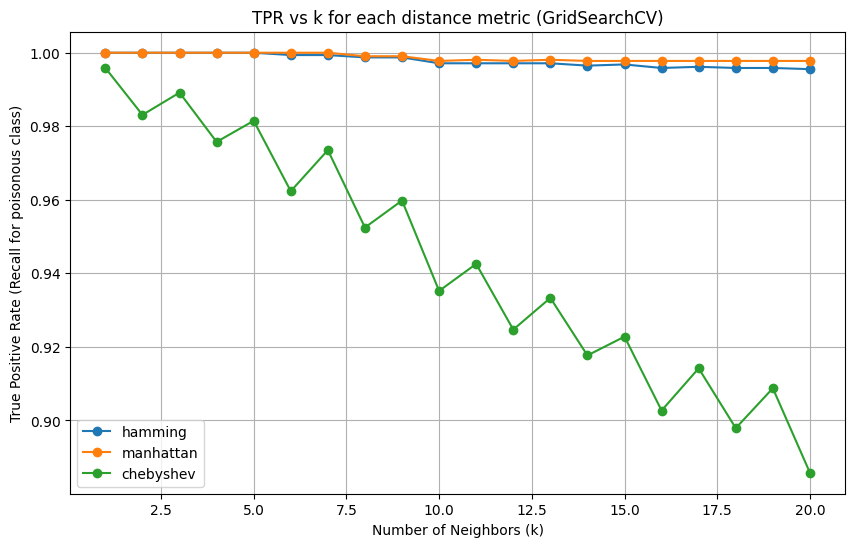

Best Parameters: {'metric': 'hamming', 'n_neighbors': 1}
Best TPR Score:  1.0
Test Accuracy: 1.0

🔍 Final Model Evaluation Summary
✅ Best k (n_neighbors): 1
✅ Best Distance Metric: hamming
📈 Best Cross-Validation TPR (Recall for poisonous): 1.0000
🧪 Test Accuracy: 1.0000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define grid and scorer
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['hamming', 'manhattan', 'chebyshev']
}
tpr_scorer = make_scorer(recall_score, pos_label=1)

# Step 2: Run GridSearchCV with TPR as scoring
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring=tpr_scorer,
    return_train_score=False
)
grid.fit(X_train, y_train)

# Step 3: Organize results into dataframe
results = pd.DataFrame(grid.cv_results_)

# Step 4: Plot TPR vs k for each metric
plt.figure(figsize=(10, 6))
for metric in param_grid['metric']:
    subset = results[results['param_metric'] == metric]
    plt.plot(
        subset['param_n_neighbors'],
        subset['mean_test_score'],
        marker='o',
        label=metric
    )

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('True Positive Rate (Recall for poisonous class)')
plt.title('TPR vs k for each distance metric (GridSearchCV)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Best parameters by TPR
print("Best Parameters:", grid.best_params_)
print("Best TPR Score: ", grid.best_score_)

# Step 6: Evaluate on test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))

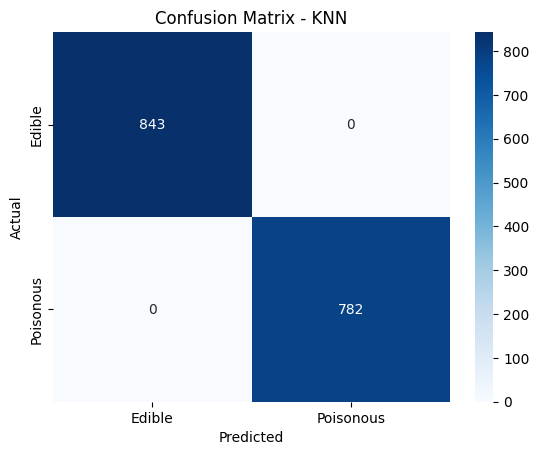

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))


              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



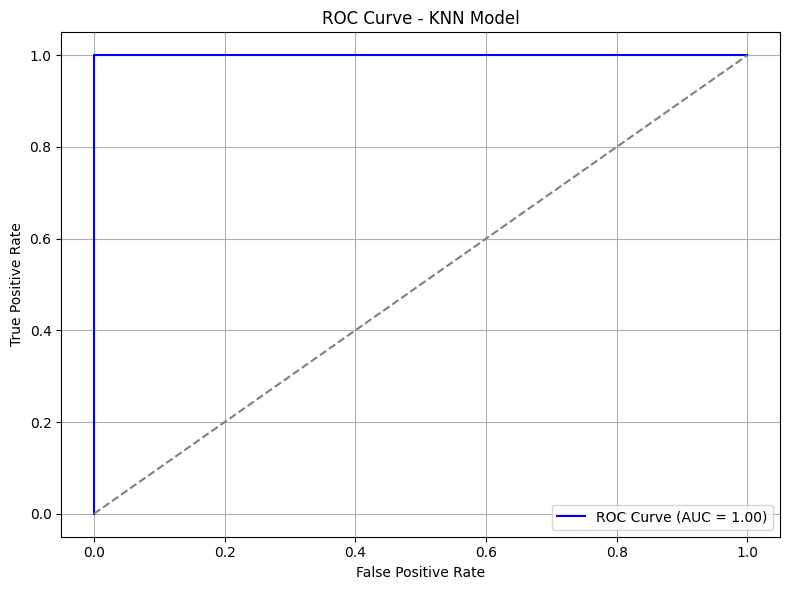

AUC Score: 1.0000


In [ ]:
from sklearn.metrics import roc_curve, auc
'''
reminder :
Mapping of encoded classes:
e → 0
p → 1
'''
# Get predicted probabilities (probability of class 1 : poisenous)
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"AUC Score: {roc_auc:.4f}")


## 🧠 Conclusion:
> 🔍 Key Points from the ROC Curve

### 🟦 1. AUC = 1.00  
- **AUC (Area Under the Curve)** is **1.00**, which is the **maximum possible score**.  
- This means your model is **perfectly separating** the two classes (likely `'edible'` vs `'poisonous'`).


### 📈 2. The blue ROC curve hugs the top-left corner  
At that top-left point:
- **True Positive Rate (TPR) = 1.0**
- **False Positive Rate (FPR) = 0.0**

➡️ In plain terms:  
There are **no false positives** and **no false negatives** at an optimal threshold — this is **ideal model behavior**.

---

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 3. Cross-validation sur le train set
grid = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# 4. Testing the model
tree = grid.best_estimator_
y_pred = tree.predict(X_test)
print("🧪 Accuracy for the  :", accuracy_score(y_test, y_pred))

# 5. evaluation
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


🧪 Accuracy for the  : 1.0
Test Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

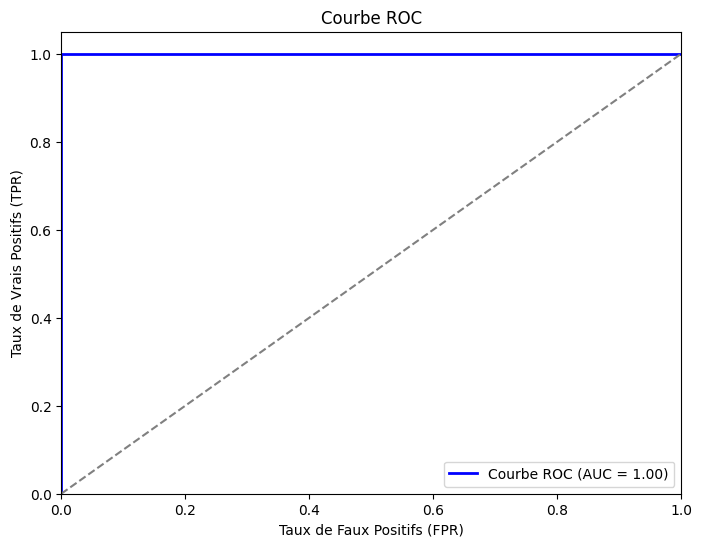

In [ ]:

y_prob = tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


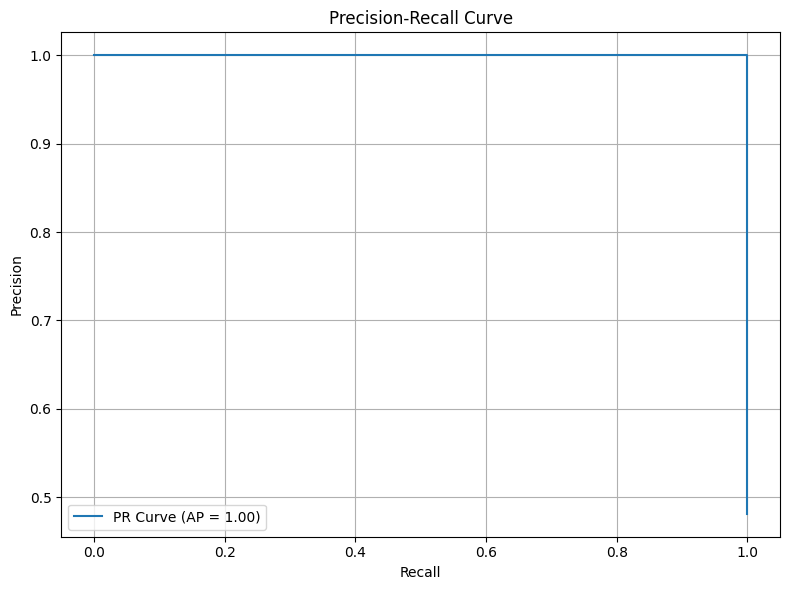

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities of the positive class (class 1)
y_proba = tree.predict_proba(X_test)[:, 1]

# Compute precision-recall points
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute average precision score (area under PR curve)
avg_precision = average_precision_score(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


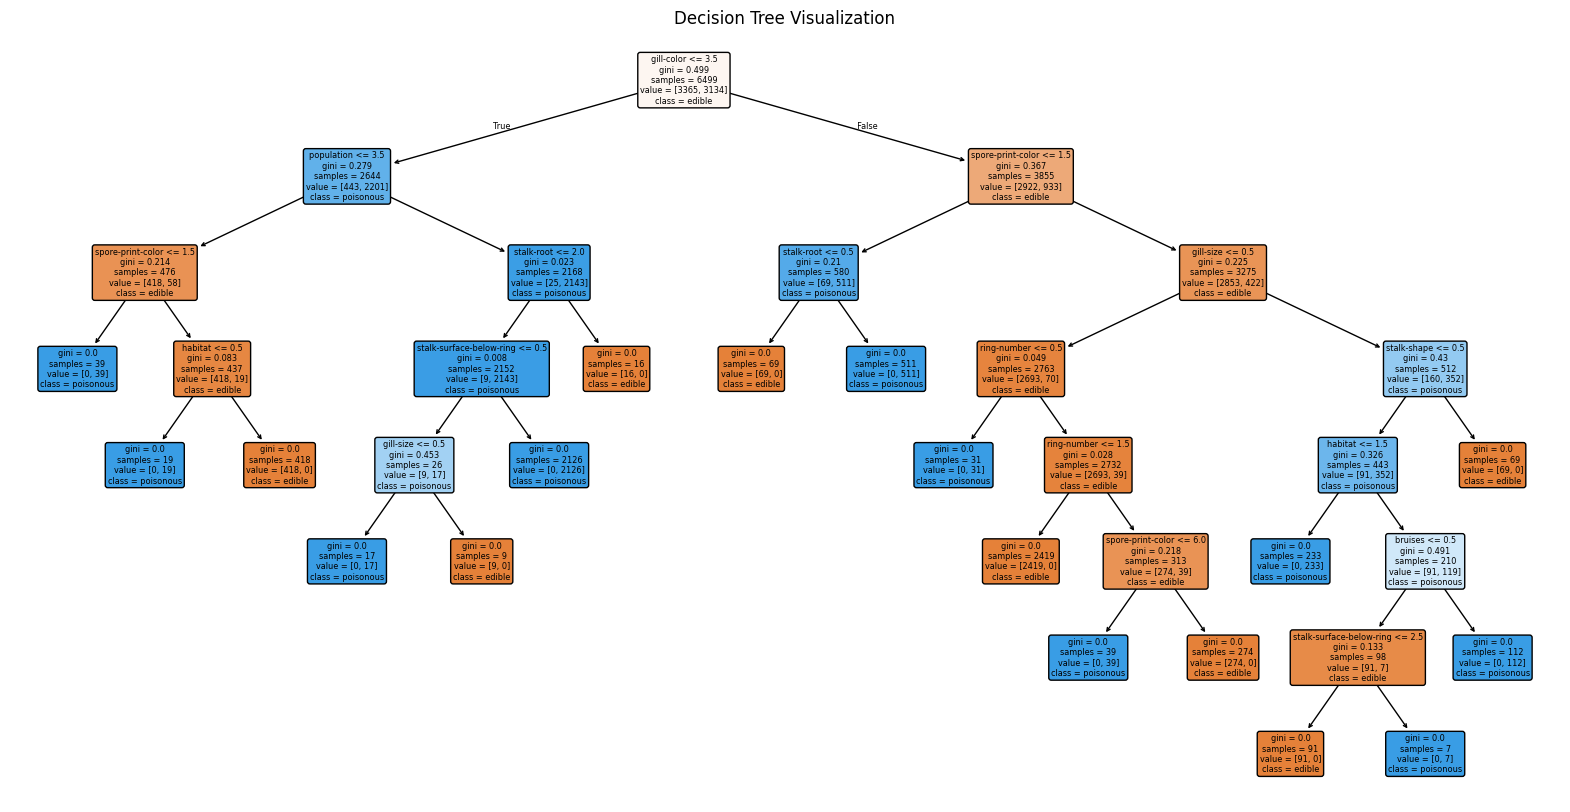

In [ ]:

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Increase for large trees
plot_tree(
    tree,
    feature_names=X_train.columns,      # Replace with correct feature names if it's a DataFrame
    class_names=['edible', 'poisonous'],  # Adjust as needed
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()
